# Tweets NLP RNN Disaster Detection 

## 1.Project Introduction 

In this project, we need use NLP technique to process Tweets message to pretect Disaster, We will use deep learning RNN to do this project.


The dataset contains a total of 10,876 labeled tweets, with approximately 43% of the tweets being classified as disaster-related. The tweets are represented as a collection of strings, which are typically short and written in natural language.


RNNs have a vanishing gradient problem, which makes it difficult to train them on long sequences of data.
LSTM, or Long Short-Term Memory, is a type of RNN that solves the vanishing gradient problem by using gates to control the flow of information. The gates allow the network to selectively remember or forget information from previous time steps, which makes it better suited for processing long sequences of data.
GRU, or Gated Recurrent Unit, is another type of RNN that also uses gates to control the flow of information. However, GRUs have fewer parameters than LSTMs and are faster to train.
NLP, or Natural Language Processing, is a field of study that focuses on the interaction between computers and human languages. NLP techniques are used to analyze, understand, and generate human language.

In the context of NLP, RNNs, LSTMs, and GRUs are often used for tasks such as language modeling, machine translation, and sentiment analysis. Each type of network has its own strengths and weaknesses, and the choice of which to use depends on the specific task and dataset.

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/glove-global-vectors-for-word-representation/glove.6B.200d.txt
/kaggle/input/glove-global-vectors-for-word-representation/glove.6B.50d.txt
/kaggle/input/glove-global-vectors-for-word-representation/glove.6B.100d.txt
/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


## 2.Library Import

We will use keras model to create RNN traing model.

In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/glove-global-vectors-for-word-representation/glove.6B.200d.txt
/kaggle/input/glove-global-vectors-for-word-representation/glove.6B.50d.txt
/kaggle/input/glove-global-vectors-for-word-representation/glove.6B.100d.txt
/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


In [6]:
import pathlib
import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import torch
# from plotly.subplots import make_subplots
# import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import copy
import os
import torch
from PIL import Image
from PIL import Image, ImageDraw


# model development
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.python.ops.array_ops import tensor_scatter_update
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import RandomFlip, RandomZoom, RandomRotation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Input, Activation, Add, GlobalAveragePooling2D 
from tensorflow.keras import regularizers

## 2. Load Data 

In [7]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/glove-global-vectors-for-word-representation/glove.6B.200d.txt
/kaggle/input/glove-global-vectors-for-word-representation/glove.6B.50d.txt
/kaggle/input/glove-global-vectors-for-word-representation/glove.6B.100d.txt
/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


### Use the following code to reduce memory usage, since sometime it would be out of memory while using TPU/CPU.  

In [8]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df


In [9]:
def import_data(file):
    """create a dataframe and optimize its memory usage"""
    df = pd.read_csv(file, parse_dates=True, keep_date_col=True)
    df = reduce_mem_usage(df)
    return df

In [57]:
# get training data
train_data = import_data('/kaggle/input/nlp-getting-started/train.csv')
test_data = import_data('/kaggle/input/nlp-getting-started/test.csv')
labels = import_data('/kaggle/input/nlp-getting-started/sample_submission.csv')
print(len(labels))
print(labels.head())
print(train_data.head())
 

Memory usage of dataframe is 0.29 MB
Memory usage after optimization is: 0.54 MB
Decreased by -84.4%
Memory usage of dataframe is 0.10 MB
Memory usage after optimization is: 0.26 MB
Decreased by -161.4%
Memory usage of dataframe is 0.05 MB
Memory usage after optimization is: 0.01 MB
Decreased by 81.1%
3263
   id  target
0   0       0
1   2       0
2   3       0
3   9       0
4  11       0
   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  


## 3. EDA 


### Check data structure

In [20]:
# Train data info
print(train_data.info())
print(train_data.describe()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   id        7613 non-null   int16   
 1   keyword   7552 non-null   category
 2   location  5080 non-null   category
 3   text      7613 non-null   category
 4   target    7613 non-null   int8    
dtypes: category(3), int16(1), int8(1)
memory usage: 548.7 KB
None
                 id      target
count   7613.000000  7613.00000
mean    5441.934848     0.42966
std     3137.116090     0.49506
min        1.000000     0.00000
25%     2734.000000     0.00000
50%     5408.000000     0.00000
75%     8146.000000     1.00000
max    10873.000000     1.00000


In [42]:
print(labels.info())
print(labels.describe())
print(labels['target'].value_counts())
print(labels['target'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      3263 non-null   int16
 1   target  3263 non-null   int8 
dtypes: int16(1), int8(1)
memory usage: 9.7 KB
None
                 id  target
count   3263.000000  3263.0
mean    5427.152927     0.0
std     3146.427221     0.0
min        0.000000     0.0
25%     2683.000000     0.0
50%     5500.000000     0.0
75%     8176.000000     0.0
max    10875.000000     0.0
0    3263
Name: target, dtype: int64
0       0
1       0
2       0
3       0
4       0
       ..
3258    0
3259    0
3260    0
3261    0
3262    0
Name: target, Length: 3263, dtype: int8


## Visualize target label

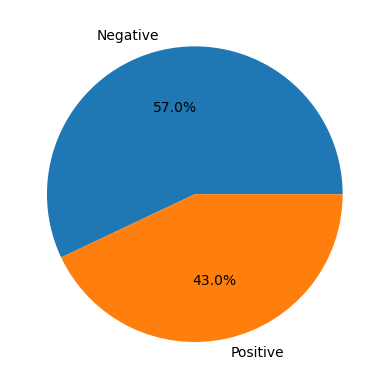

0    4342
1    3271
Name: target, dtype: int64
1.3274228064811984


In [45]:
# visualize the distribution of a numerical variable using a histogram
label_count = train_data['target'].value_counts()
labels_des = ['Negative', 'Positive']

plt.pie(label_count, labels=labels_des, autopct='%1.1f%%')

plt.show()

print(label_count)
print(label_count[0] / label_count[1])

### Checking the dimension of the data
 Based on the output, there are 7613 instances of tweets labeled to either 0 or 1 in the training set, and there seems to be no null entries, when we only consider the text and the labels.

Since neither the keyword nor location column seems to be significant, so we will ignore them.

### Preprocess the text column to remove all noise for NLP process



For NLP processing, the most important part is EDA process, during the EDA process, we need remove all of the noise words, such as stop words, html, puncutations and etc. 
I created the following function to do remove all stop words, html, puncutations, shortforms and low case all words.

In [47]:
#remove punctuations
import re
import string
from bs4 import BeautifulSoup
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from collections import OrderedDict
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from gensim.parsing.preprocessing import remove_stopwords
table = str.maketrans("", "", string.punctuation)
def remove_punc(text):
    return text.translate(table)

# Clean text by removing URLs, punctuation, and converting to lowercase
def clean_text(text):
    text = re.sub(r'http\S+', '', text) # Remove URLs
    text = text.translate(str.maketrans('', '', string.punctuation)) # Remove punctuation
    text = text.lower() # Convert to lowercase
    return text

#removing any shortforms if present
def remove_shortforms(phrase):
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

def remove_special_char(text):
    text = re.sub('[^A-Za-z0-9]+'," ",text)
    return text

def remove_wordswithnum(text):
    text = re.sub("\S*\d\S*", "", text).strip()
    return text

def lowercase(text):
    text = text.lower()
    return text

def remove_stop_words(text):
    text = remove_stopwords(text)
    return text

st = SnowballStemmer(language='english')
def stemming(text):
    r= []
    for word in text :
        a = st.stem(word)
        r.append(a)
    return r

def listToString(s):  
    str1 = " "   
    return (str1.join(s))

def remove_punctuations(text):
    text = re.sub(r'[^\w\s]','',text)
    return text

def remove_links(text):
    text = re.sub(r'http\S+', '', text)
    return text

# lemmatizer = WordNetLemmatizer()
# def lemmatize_words(text):
#     text = lemmatizer.lemmatize(text)
#     return text

def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

In [48]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   id        7613 non-null   int16   
 1   keyword   7552 non-null   category
 2   location  5080 non-null   category
 3   text      7613 non-null   category
 4   target    7613 non-null   int8    
dtypes: category(3), int16(1), int8(1)
memory usage: 548.7 KB


### check word pattern before preprocesing text

Drawing a word cloud pattern first, will compare to the pattern after EDA.

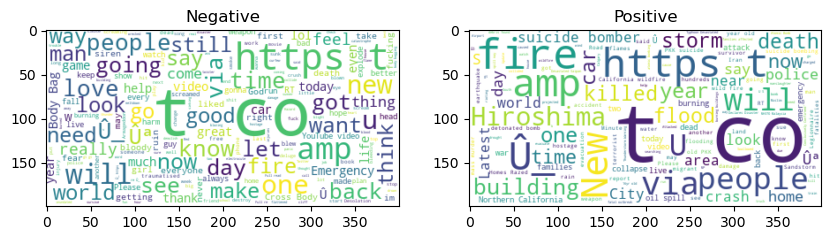

In [58]:
from wordcloud import WordCloud
negative_cases = "".join(train_data[train_data['target'] == 0]['text'].values)
positive_cases = "".join(train_data[train_data['target'] == 1]['text'].values)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

wc1 = WordCloud(background_color='white').generate(negative_cases)
wc2 = WordCloud(background_color='white').generate(positive_cases)

axs[0].imshow(wc1, interpolation='bilinear')
axs[0].set_title('Negative')
axs[1].imshow(wc2, interpolation='bilinear')
axs[1].set_title('Positive')

plt.show()

In [59]:
train_data['text'] = train_data.text.apply(lambda x: remove_punc(x))
train_data['text'] = train_data.text.apply(lambda x: clean_text(x))
train_data['text'] = train_data.text.apply(lambda x: remove_shortforms(x))
train_data['text'] = train_data.text.apply(lambda x: remove_wordswithnum(x))
train_data['text'] = train_data.text.apply(lambda x: lowercase(x))
train_data['text'] = train_data.text.apply(lambda x: remove_stop_words(x))
train_data['text'] = train_data.text.apply(lambda x: remove_punctuations(x))
train_data['text'] = train_data.text.apply(lambda x: remove_links(x))
# train_data['text'] = train_data.text.apply(lambda x: lemmatize_words(x))
train_data['text'] = train_data.text.apply(lambda x: remove_html(x))

 
train_data.head(100)



,id,keyword,location,text,target
0,1,NaN,NaN,deeds reason earthquake allah forgive,1
1,4,NaN,NaN,forest near la ronge sask canada,1
2,5,NaN,NaN,residents asked shelter place notified officer...,1
3,6,NaN,NaN,people receive wildfires evacuation orders cal...,1
4,7,NaN,NaN,got sent photo ruby alaska smoke wildfires pou...,1
...,...,...,...,...,...
95,137,accident,Charlotte,mile backup southaccident blocking right lanes...,1
96,138,accident,"Baton Rouge, LA",accident changed life help determine options f...,0
97,139,accident,"Hagerstown, MD",breaking deadly motorcycle car accident happen...,1
98,141,accident,"Gloucestershire , UK",flowri marinading accident,0


In [60]:
 
test_data['text'] = test_data.text.apply(lambda x: remove_punc(x))
test_data['text'] = test_data.text.apply(lambda x: clean_text(x))
test_data['text'] = test_data.text.apply(lambda x: remove_shortforms(x))
test_data['text'] = test_data.text.apply(lambda x: remove_wordswithnum(x))
test_data['text'] = test_data.text.apply(lambda x: lowercase(x))
test_data['text'] = test_data.text.apply(lambda x: remove_stop_words(x))
test_data['text'] = test_data.text.apply(lambda x: remove_punctuations(x))
test_data['text'] = test_data.text.apply(lambda x: remove_links(x))
# test_data['text'] = test_data.text.apply(lambda x: lemmatize_words(x))
test_data['text'] = test_data.text.apply(lambda x: remove_html(x))
test_data.head(100)

,id,keyword,location,text
0,0,NaN,NaN,happened terrible car crash
1,2,NaN,NaN,heard earthquake different cities stay safe
2,3,NaN,NaN,forest spot pond geese fleeing street save
3,9,NaN,NaN,apocalypse lighting spokane wildfires
4,11,NaN,NaN,typhoon soudelor kills china taiwan
...,...,...,...,...
95,323,annihilated,NaN,nature appropriates love burn annihilated beloved
96,324,annihilated,NaN,ninahoag shred psych work friendship annihilated
97,325,annihilated,upstate NY,thehill example y conservatives annihilated bu...
98,326,annihilated,NaN,aug wiped francis josephs crack regiment annih...


In [62]:
#Remove stopwords

from nltk.corpus import stopwords

stop = set(stopwords.words("english"))

def rem_stop(text):
    word_list = [word for word in text.split() if word not in stop]
    return " ".join(word_list)


In [63]:
import re
train_data['text'] = train_data.text.apply(lambda x: rem_stop(x))
test_data['text'] = test_data.text.apply(lambda x: rem_stop(x))
train_data['text'] = train_data.text.apply(lambda x: clean_text(x))
test_data['text'] = test_data.text.apply(lambda x: clean_text(x))

train_data.drop(['id', 'keyword', 'location'], axis=1, inplace=True)
train_data.head(10)
train_data['target'].value_counts()

 

test_data.drop(['id', 'keyword', 'location'], axis=1, inplace=True)
test_data.head(10)
 

,text
0,happened terrible car crash
1,heard earthquake different cities stay safe
2,forest spot pond geese fleeing street save
3,apocalypse lighting spokane wildfires
4,typhoon soudelor kills china taiwan
5,shakingits earthquake
6,theyd probably life arsenal yesterday eh eh
7,hey
8,nice hat
9,fuck


### Show word pattern after preprocessing

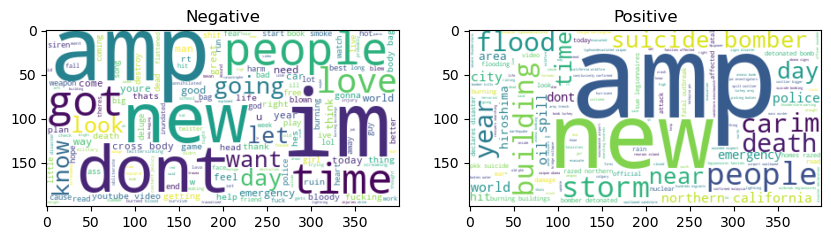

In [64]:
from wordcloud import WordCloud
negative_cases = "".join(train_data[train_data['target'] == 0]['text'].values)
positive_cases = "".join(train_data[train_data['target'] == 1]['text'].values)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

wc1 = WordCloud(background_color='white').generate(negative_cases)
wc2 = WordCloud(background_color='white').generate(positive_cases)

axs[0].imshow(wc1, interpolation='bilinear')
axs[0].set_title('Negative')
axs[1].imshow(wc2, interpolation='bilinear')
axs[1].set_title('Positive')

plt.show()

## 4. Preparing the training & validation data

In [65]:
train_X = train_data.drop(['target'],axis=1).to_numpy().reshape(-1,)
train_y = train_data['target'].to_numpy()

test_data =test_data.to_numpy().reshape(-1,)

In [66]:
from sklearn.model_selection import train_test_split
# X_train_dev, X_test, y_train_dev, y_test = train_test_split(bigX, bigy,
#                                                     stratify=bigy,
#                                                     test_size=0.2)

X_train, X_val, y_train, y_val = train_test_split(train_X, train_y,
                                                    stratify=train_y,
                                                    test_size=0.2)

In [67]:
print(train_X.shape)
print(train_X[0])

(7613,)
deeds reason earthquake allah forgive


## 5.Build RNN Training Models

we will build two RNN Training Models: LSTM and GRU, and will using the validation data to check which model is more accuracy to use for this NLP process.
In this model, I apply the EarlyStopping if the accuracy won't increase anymore, it can save time and get a better performance.
Both model will use word embedding methods to create an embedding layer.

In [68]:
maxlen = 0
vocab = {"PAD": 0, "UNK": 1}
for i in range(len(train_X)) :
    if len(train_X[i]) > maxlen:
        maxlen = len(train_X[i])
    for word in train_X[i].split():
        if word not in vocab:               # word has not been assigned an index yet
            vocab[word] = len(vocab)        # Assign each word with a unique index
print(maxlen, len(vocab))

vocab_size = len(vocab)

138 16361


## 5.1 RNN LSTM Model 

LSTM (Long Short-Term Memory) is a type of Recurrent Neural Network (RNN) that is commonly used for Natural Language Processing (NLP) tasks such as language modeling, text classification, and sentiment analysis.
We already don the Data Preprocessing, here we will do the Model Training and Model Evaluation.

### RNN LSTM Model Trainning

This involves defining the architecture of the model, which typically includes one or more LSTM layers followed by one or more fully connected (dense) layers. The model is then trained using a training dataset, with the objective of minimizing a loss function such as cross-entropy.

In [69]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_words = 1000
max_len = 150
tokenizer = Tokenizer(num_words=max_words)

tokenizer.fit_on_texts(X_train)
sequences = tokenizer.texts_to_sequences(X_train)
padded_seq_train =  pad_sequences(sequences,maxlen=max_len)
 
sequences_val = tokenizer.texts_to_sequences(X_val)
padded_seq_val =  pad_sequences(sequences_val,maxlen=max_len)
 
print(padded_seq_train.shape)
print(padded_seq_val.shape)

 

(6090, 150)
(1523, 150)


In [70]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_words = 1000
max_len = 150
tokenizer_test = Tokenizer(num_words=max_words)

tokenizer_test.fit_on_texts(test_data)
sequences_test = tokenizer_test.texts_to_sequences(test_data)
padded_seq_test =  pad_sequences(sequences_test,maxlen=max_len)
 
 
 

In [71]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

model = models.Sequential()



model.add(layers.Embedding(max_words,50,input_length=max_len, input_shape=[max_len]))
# model.add(SimpleRNN(units=64))
# model.add(layers.LSTM(64, dropout=0.5))
model.add(layers.LSTM(100,return_sequences=True)) 
model.add(layers.LSTM(200))
model.add(layers.Dropout(0.5))
# model.add(layers.Dense(256, activation='relu'))
# model.add(layers.Dense(1, activation='sigmoid'))

# model.summary()

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 
 

# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary() 


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 50)           50000     
                                                                 
 lstm (LSTM)                 (None, 150, 100)          60400     
                                                                 
 lstm_1 (LSTM)               (None, 200)               240800    
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense (Dense)               (None, 256)               51456     
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 402,913
Trainable params: 402,913
Non-trai

In [74]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',mode='max',verbose=1,patience=3)
# history = model.fit(padded_seq_train,
#                     y_train,
#                     epochs=20,
#                     batch_size=72,
#                     validation_data=(padded_seq_val, y_val))
# adding early stopping monitor to determine the best validation accuracy for the mode
history = model.fit(padded_seq_train,y_train,
                    batch_size=72,
                    epochs=30,
                    validation_data=(padded_seq_val, y_val) ,
                    callbacks=[es]
)

Epoch 1/30
85/85 [==============================] - 51s 597ms/step - loss: 0.2433 - accuracy: 0.9000 - val_loss: 0.7674 - val_accuracy: 0.7433
Epoch 2/30
85/85 [==============================] - 50s 592ms/step - loss: 0.3452 - accuracy: 0.8729 - val_loss: 0.5885 - val_accuracy: 0.6999
Epoch 3/30
85/85 [==============================] - 50s 592ms/step - loss: 0.5730 - accuracy: 0.8179 - val_loss: 0.6096 - val_accuracy: 0.7768
Epoch 4/30
85/85 [==============================] - 51s 595ms/step - loss: 0.3369 - accuracy: 0.8603 - val_loss: 0.6527 - val_accuracy: 0.7413
Epoch 5/30
85/85 [==============================] - 51s 599ms/step - loss: 0.2463 - accuracy: 0.9015 - val_loss: 0.6614 - val_accuracy: 0.7452
Epoch 6/30
85/85 [==============================] - 52s 614ms/step - loss: 0.2924 - accuracy: 0.8885 - val_loss: 0.7233 - val_accuracy: 0.7505
Epoch 6: early stopping


### RNN Model Evaluation

it is evaluated using a separate validation dataset to determine its accuracy. 

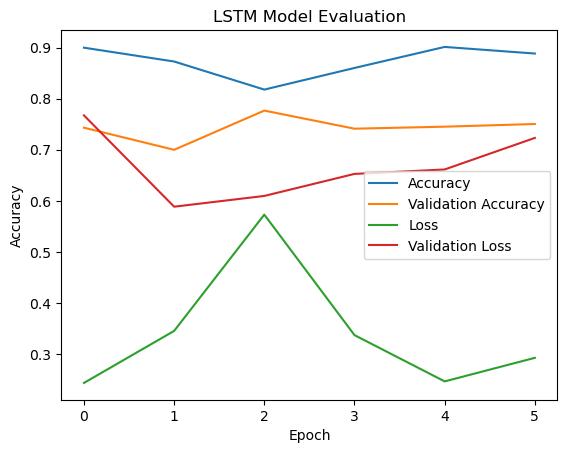

In [78]:
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title("LSTM Model Evaluation")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","Loss","Validation Loss"])

plt.show()

##  5.2 GRU Based RNN Model 
GRU (Gated Recurrent Unit) is another type of Recurrent Neural Network (RNN) that is commonly used for Natural Language Processing (NLP) tasks such as language modeling, text classification, and sentiment analysis.
we're using the Keras library to build a GRU RNN model for a text classification task. We're using Tokenizer and pad_sequences to preprocess the text data and convert it into a numerical format that can be used as input to the model. We're then defining the architecture of the model, which includes an Embedding layer to convert the numerical vectors into dense embeddings, a GRU layer to process the sequence of embeddings, and a Dense layer with a sigmoid activation function to output the predicted label.  


In [79]:
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)
print(y_val_cat.shape)
print(y_val.shape)
print(y_val_cat )
print(y_val )

(1523, 2)
(1523,)
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [0. 1.]]
[0 0 0 ... 0 0 1]


In [80]:
from tensorflow.keras.layers import Embedding, Dense, GRU, Dropout, Bidirectional, SpatialDropout1D
EMBEDDING_DIM = 256
print(vocab_size,maxlen) 
model_gru = Sequential()
model_gru.add(Embedding(vocab_size, EMBEDDING_DIM, input_length=150))
model_gru.add(SpatialDropout1D(0.2))
model_gru.add(Bidirectional(GRU(128)))
model_gru.add(Dense(128, activation='sigmoid'))
model_gru.add(Dropout(0.2))
model_gru.add(Dense(2, activation='softmax'))
model_gru.compile(loss='categorical_crossentropy', optimizer='adamax', metrics=['accuracy'])
# model_gru.compile(loss='binary_crossentropy', optimizer='adam')
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=1)
model_gru.summary()

16361 138
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 150, 256)          4188416   
                                                                 
 spatial_dropout1d (SpatialD  (None, 150, 256)         0         
 ropout1D)                                                       
                                                                 
 bidirectional (Bidirectiona  (None, 256)              296448    
 l)                                                              
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 2)      

In [81]:
# X_train, X_val, y_train, y_val
es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',mode='max',verbose=1,patience=3)
# history1 = model_gru.fit(padded_seq_train, y_train_cat, epochs=20, validation_data=(padded_seq_val, y_val_cat), batch_size=64, callbacks=[callback])
history1 = model_gru.fit(padded_seq_train, y_train_cat, epochs=20, validation_data=(padded_seq_val, y_val_cat), batch_size=64, callbacks=[es])
# history1 = model_gru.fit(padded_seq_train, y_train, epochs=20, validation_data=(padded_seq_val, y_val), batch_size=64, callbacks=[es])

Epoch 1/20
96/96 [==============================] - 48s 462ms/step - loss: 0.6727 - accuracy: 0.5890 - val_loss: 0.5515 - val_accuracy: 0.7459
Epoch 2/20
96/96 [==============================] - 43s 443ms/step - loss: 0.4932 - accuracy: 0.7650 - val_loss: 0.4516 - val_accuracy: 0.8004
Epoch 3/20
96/96 [==============================] - 43s 443ms/step - loss: 0.4310 - accuracy: 0.8033 - val_loss: 0.4437 - val_accuracy: 0.8083
Epoch 4/20
96/96 [==============================] - 42s 436ms/step - loss: 0.4118 - accuracy: 0.8141 - val_loss: 0.4449 - val_accuracy: 0.8076
Epoch 5/20
96/96 [==============================] - 41s 432ms/step - loss: 0.3963 - accuracy: 0.8202 - val_loss: 0.4552 - val_accuracy: 0.8116
Epoch 6/20
96/96 [==============================] - 42s 434ms/step - loss: 0.3843 - accuracy: 0.8278 - val_loss: 0.4511 - val_accuracy: 0.7991
Epoch 7/20
96/96 [==============================] - 42s 439ms/step - loss: 0.3779 - accuracy: 0.8322 - val_loss: 0.4557 - val_accuracy: 0.8050

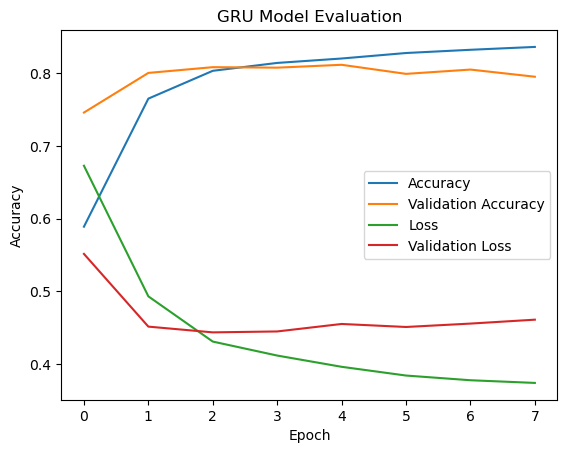

In [83]:
plt.plot(history1.history["accuracy"])
plt.plot(history1.history['val_accuracy'])
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

plt.title("GRU Model Evaluation")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","Loss","Validation Loss"])

plt.show()

# 6. Conclusion


In the context of NLP, RNNs, LSTMs, and GRUs are often used for tasks such as language modeling, machine translation, and sentiment analysis. Each type of network has its own strengths and weaknesses, and the choice of which to use depends on the specific task and dataset.
In general, LSTMs are preferred for tasks that require processing long sequences of data, while GRUs are preferred for faster training and smaller datasets. However, recent research has shown that there is no clear winner between LSTMs and GRUs, and the choice between the two often comes down to the specific task and dataset.
But in this project, there is no huge difference between LSTM and GRU, but if consider all of parameters including accuacy and lost funtion, GRU is little bit better than LSTM.

# 7. Export the best result into file


In [84]:
# Making Prediction
y_pred = model_gru.predict(padded_seq_test)
# y_pred = model.predict(padded_seq_test)

102/102 [==============================] - 7s 64ms/step


In [85]:
predictions = model.predict(padded_seq_test, verbose=1)

102/102 [==============================] - 14s 129ms/step


In [86]:
test_data = import_data('/kaggle/input/nlp-getting-started/test.csv')
print(test_data['id'])

Memory usage of dataframe is 0.10 MB
Memory usage after optimization is: 0.26 MB
Decreased by -161.4%
0           0
1           2
2           3
3           9
4          11
        ...  
3258    10861
3259    10865
3260    10868
3261    10874
3262    10875
Name: id, Length: 3263, dtype: int16


In [87]:
id_col = test_data['id']
test = test_data.drop(['id', 'keyword', 'location'], axis=1).to_numpy().reshape(-1,)
sequences = tokenizer.texts_to_sequences(test)
sequences_matrix_test_final =  pad_sequences(sequences,maxlen=max_len)
y_pred = model.predict(sequences_matrix_test_final)
y_pred[y_pred <= 0.5] = 0.
y_pred[y_pred > 0.5] = 1.
y_pred = y_pred.astype(int)
y_pred

102/102 [==============================] - 13s 131ms/step


array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [0]])

In [61]:
prediction_df = pd.DataFrame()
prediction_df['id'] = id_col
prediction_df['target'] = y_pred
prediction_df

,id,target
0,0,1
1,2,1
2,3,1
3,9,0
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1


In [62]:
prediction_df.to_csv('submission.csv', index=False)

In [55]:
predictions1 = np.transpose(predictions)[0]
submission_df = pd.DataFrame()
submission_df['id'] = test_data['id'] 
submission_df['target'] = list(map(lambda x: 0 if x < 0.5 else 1, predictions1))
submission_df.head()
 

,id,target
0,0,1
1,2,1
2,3,0
3,9,1
4,11,0


In [57]:
submission_df.to_csv('submission.csv', index=False)